<a href="https://colab.research.google.com/github/ykbintang/Machine-Learning/blob/main/Bank%20Churn%20Prediction/bcp-dt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Churn Prediction - Decision Tree
The aim of this project is to predict whether a credit card customer will leave bank services or not. Note, this project uses the Decision Tree learning algorithm by changing the number of learning data sets.

Data diambil dari [situs Kaggle](https://www.kaggle.com/code/chetbounl/data-exploration-model-evaluation-on-bankchurners/data) yang gterdiri dari 8500 data pelanggan setia dan 1627 pelanggan keluar dengan atribut data sebagai berikut.
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Customer_Age: Demographic variable — Customer’s Age in Years
* Gender: Demographic variable — M=Male, F=Female
* Dependent_count: Demographic variable — Number of dependents
* Education_Level: Demographic variable — Educational Qualification of the account holder (example: high school, college graduate, etc.)
* Marital_Status: Demographic variable — Married, Single, Divorced, Unknown
* Income_Category: Demographic variable — Annual Income Category of the account holder (< 40K,40K,40K — 60K, 60K−60K−80K, 80K−80K−120K, > $120K, Unknown)
* Card_Category: Product Variable — Type of Card (Blue, Silver, Gold, Platinum)
* Months_on_book: Period of relationship with bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

This experiment was conducted to see the adaptive nature of machine learning and the accuracy of the model in relation to the amount of experience/dataset given to the machine.

There are two experiments:

1. When the amount of outgoing customer data is much less than the amount of loyal customer data.
2. When the amount of data for the two types of customers is almost equal.

In this experiment the number of outgoing customers was varied to see changes in the model resulting from machine learning.

## Load dataset

In [2]:
import pandas as pd

# Download datasets for machine learning
df = pd.read_csv('/content/BankChurners.csv')

## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [4]:
# Delete columns that are not needed
delete_columns = [0, 16, 19, 21, 22]
df.drop(df.columns[delete_columns], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [5]:
# Rename the Attrition_Flag column to status
df.rename(columns={'Attrition_Flag':'status'}, inplace=True)

In [6]:
# Attrition_Flag is a data label, which informs whether the customer has abandoned the bank's credit card service or not
df['status'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: status, dtype: int64

## First Experiment
In this case, we set the number of outgoing customers at 400 people, while the number of loyal customers has not changed, namely 8500 people.

In [7]:
# Separate data for two types of customers
df_out = df[df['status']=='Attrited Customer']
df_loyal = df[df['status']=='Existing Customer']

len(df_loyal), len(df_out)

(8500, 1627)

In [8]:
# Take a sample of 400 outgoing customers
df_out_sampled = df_out.sample(400, random_state=2)

len(df_out_sampled)

400

In [9]:
# Combine 400 outgoing customers with loyal customers
dataset_sample = pd.concat([df_loyal, df_out_sampled])

In [10]:
# See the distribution of the number of customers based on their status/label
dataset_sample['status'].value_counts()

Existing Customer    8500
Attrited Customer     400
Name: status, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

In [12]:
# Separate the label column from the non-label column
# Delete the status column
X = dataset_sample.drop('status', axis=1)

# Retrieve the status column from the dataset
y = dataset_sample['status']

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8900 entries, 0 to 7336
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              8900 non-null   int64  
 1   Gender                    8900 non-null   object 
 2   Dependent_count           8900 non-null   int64  
 3   Education_Level           8900 non-null   object 
 4   Marital_Status            8900 non-null   object 
 5   Income_Category           8900 non-null   object 
 6   Card_Category             8900 non-null   object 
 7   Months_on_book            8900 non-null   int64  
 8   Total_Relationship_Count  8900 non-null   int64  
 9   Months_Inactive_12_mon    8900 non-null   int64  
 10  Contacts_Count_12_mon     8900 non-null   int64  
 11  Credit_Limit              8900 non-null   float64
 12  Total_Revolving_Bal       8900 non-null   int64  
 13  Avg_Open_To_Buy           8900 non-null   float64
 14  Total_Tr

In [14]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 8900 entries, 0 to 7336
Series name: status
Non-Null Count  Dtype 
--------------  ----- 
8900 non-null   object
dtypes: object(1)
memory usage: 139.1+ KB


In [15]:
# Change the type of non-numeric columns to numeric
X = pd.get_dummies(X, drop_first=True) # Hot Encoding the category/string columns

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8900 entries, 0 to 7336
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    8900 non-null   int64  
 1   Dependent_count                 8900 non-null   int64  
 2   Months_on_book                  8900 non-null   int64  
 3   Total_Relationship_Count        8900 non-null   int64  
 4   Months_Inactive_12_mon          8900 non-null   int64  
 5   Contacts_Count_12_mon           8900 non-null   int64  
 6   Credit_Limit                    8900 non-null   float64
 7   Total_Revolving_Bal             8900 non-null   int64  
 8   Avg_Open_To_Buy                 8900 non-null   float64
 9   Total_Trans_Amt                 8900 non-null   int64  
 10  Total_Trans_Ct                  8900 non-null   int64  
 11  Avg_Utilization_Ratio           8900 non-null   float64
 12  Gender_M                        89

In [17]:
# Divide data (non-label and labeled) into training set (70%) and test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [18]:
# Check the amount of data in the train and test set
len(X_train), len(X_test)

(6230, 2670)

In [19]:
# Define the Decision Tree model
model = DecisionTreeClassifier(max_depth=2, random_state=2)

In [20]:
# Train the model with the training set
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=2)

In [21]:
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

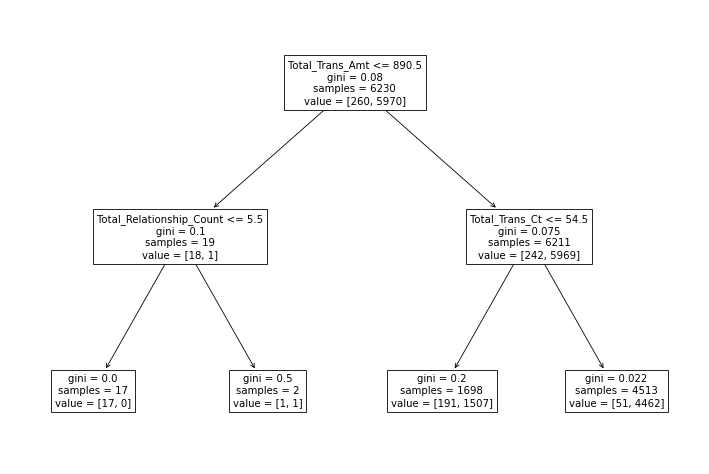

In [22]:
# Display the model obtained
plt.figure(figsize=(15,10), dpi=60)
plot_tree(model, feature_names=X.columns);

In [23]:
# Display the model obtained
rules = tree.export_text(model)
print(rules)

|--- feature_9 <= 890.50
|   |--- feature_3 <= 5.50
|   |   |--- class: Attrited Customer
|   |--- feature_3 >  5.50
|   |   |--- class: Attrited Customer
|--- feature_9 >  890.50
|   |--- feature_10 <= 54.50
|   |   |--- class: Existing Customer
|   |--- feature_10 >  54.50
|   |   |--- class: Existing Customer



In [24]:
# Evaluate model performance using the test set
pred = model.predict(X_test)

In [25]:
# Calculate the recall value from the prediction results
recall_score(y_test, pred, average=None)

array([0.07142857, 0.99960474])

In [26]:
model.classes_

array(['Attrited Customer', 'Existing Customer'], dtype=object)

## Second Experiment
In this case, all examples of 1627 outgoing customers and 8500 loyal customers are used in model training and evaluation.

In [27]:
# Copy the dataset from the initial data collection results
dataset_full = df.copy(deep=True)

In [28]:
# Separate the label column from the non-label column
# Delete the status column
X = dataset_full.drop('status', axis=1)

# Retrieve the status column from the dataset
y = dataset_full['status']

In [29]:
# Change the type of non-numeric columns to numeric
X = pd.get_dummies(X, drop_first=True) # Hot Encoding the category/string columns

In [30]:
# Divide data (non-label and labeled) into training set (70%) and test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [31]:
# Define the Decision Tree model
model2 = DecisionTreeClassifier(max_depth=2, random_state=2)

In [32]:
# Train the model with the training set
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=2)

In [33]:
# Display the model obtained
rules = tree.export_text(model2)
print(rules)

|--- feature_10 <= 54.50
|   |--- feature_7 <= 615.50
|   |   |--- class: Attrited Customer
|   |--- feature_7 >  615.50
|   |   |--- class: Existing Customer
|--- feature_10 >  54.50
|   |--- feature_9 <= 5361.50
|   |   |--- class: Existing Customer
|   |--- feature_9 >  5361.50
|   |   |--- class: Existing Customer



In [34]:
# Evaluate model performance using the test set
pred2 = model.predict(X_test)

In [35]:
# Calculate the recall value from the prediction results
recall_score(y_test, pred2, average=None)

array([0.06832298, 0.99960876])